In [1]:
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA, TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score, silhouette_samples, mean_squared_error
from sklearn.random_projection import GaussianRandomProjection
from sklearn import mixture
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from numpy import linalg as LA

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import scipy
from scipy.linalg import pinv
import pandas as pd

import itertools
import scipy.stats

import time

import warnings
warnings.filterwarnings('ignore')

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import mutual_info_classif

# Prepare Data

In [3]:
df = pd.read_csv('data/minist_train.csv')

df_sample = df.sample(1000)

y = df_sample[df_sample.columns[0]]
X = df_sample[df_sample.columns[1:]]

# split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experiment1: Clustering

# K-Means
# Select Clusters

# Inertia

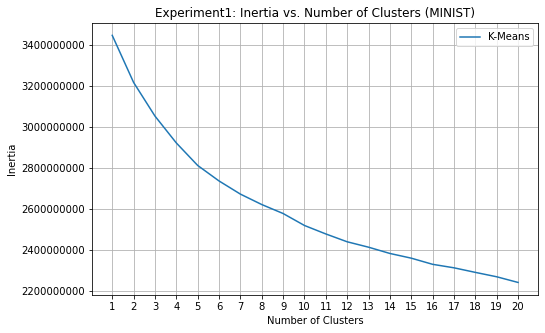

In [59]:
range_n_clusters = np.arange(1,21,1)
inertia = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X)
    inertia.append(k_means_clustering.inertia_)
inertia = np.array(inertia)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,inertia, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters)
plt.title('Experiment1: Inertia vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp1_kmeans_inertia.png')
plt.show()

# Silhouette Score

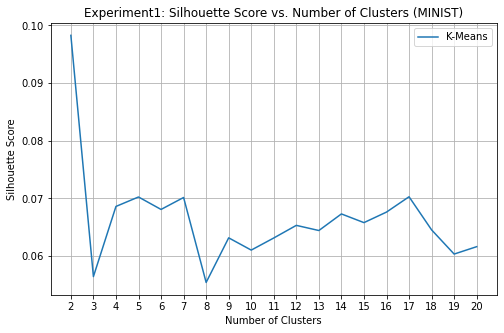

In [61]:
range_n_clusters = np.arange(2,21,1)
silhouette_avg = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X)
    silhouette_avg.append(silhouette_score(X, k_means_clustering.labels_))
silhouette_avg = np.array(silhouette_avg)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,silhouette_avg, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters) 
plt.title('Experiment1: Silhouette Score vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp1_kmeans_silhouette.png')
plt.show()

# Analysis

# adjusted_mutual_info_score

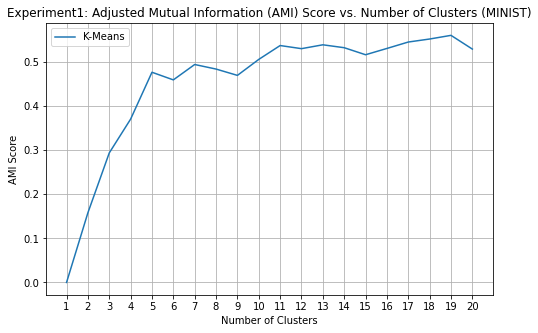

In [63]:
range_n_clusters = np.arange(1,21,1)
adjusted_mutual_info_score_value = []
for n_clusters in range_n_clusters:
    k_means_clustering = KMeans(n_clusters=n_clusters, random_state=42)
    k_means_clustering.fit(X)
    adjusted_mutual_info_score_value.append(adjusted_mutual_info_score(y, k_means_clustering.labels_))
adjusted_mutual_info_score_value = np.array(adjusted_mutual_info_score_value)
plt.figure(figsize=(8,5))
plt.plot(range_n_clusters,adjusted_mutual_info_score_value, label = "K-Means")
plt.xlabel('Number of Clusters')
plt.ylabel('AMI Score')
plt.ticklabel_format(style='plain') 
plt.xticks(range_n_clusters) 
plt.title('Experiment1: Adjusted Mutual Information (AMI) Score vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp1_kmeans_AMI.png')
plt.show()

# performance

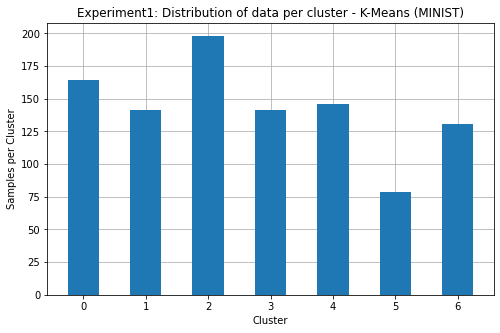

In [64]:
k = 7
k_means_clustering = KMeans(n_clusters=k, random_state=42)
y_pred = k_means_clustering.fit_predict(X)


plt.figure(figsize=(8,5))
plt.hist(y_pred, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Cluster')
plt.ylabel('Samples per Cluster')
plt.title('Experiment1: Distribution of data per cluster - K-Means (MINIST)')
plt.grid()
plt.savefig('minist_exp1_kmeans_distribution.png')

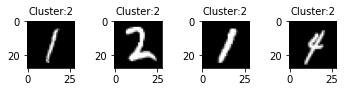

In [66]:
k = 7
k_means_clustering = KMeans(n_clusters=k, random_state=42)
y_pred = k_means_clustering.fit_predict(X)
y_plot = y_pred[:15]
index_plot = []
for i in range(len(y_plot)):
    if y_plot[i] == 2:
        index_plot.append(i) 
p =1
for j in index_plot:
    plt.subplot(4,4,p)
    p += 1
    plt.title('Cluster:{}'.format(y_plot[j]),fontsize = 10)
    plt.imshow(X.iloc[j].to_numpy().reshape(28,28),cmap='gray')
    plt.savefig('minist_exp1_kmeans_imshow.png');

# GMM
# Select Component numbers
# BIC

In [68]:
lowest_bic = np.infty
num_components_values = range(1, 20)
covariances = ['spherical', 'tied', 'diag', 'full']
bic = np.zeros((len(covariances),len(num_components_values)))
for i, covariance in enumerate(covariances):
    for j, num_components in enumerate(num_components_values):
        gmm = mixture.GaussianMixture(n_components=num_components, covariance_type=covariance)
        gmm.fit(X)
        bic[i][j] = gmm.bic(X)
        if bic[i][j] < lowest_bic:
            lowest_bic = bic[i][j]
            print("Lowest BIC currently for", covariance, num_components)
            best_gmm = gmm

Lowest BIC currently for spherical 1
Lowest BIC currently for spherical 2
Lowest BIC currently for spherical 3
Lowest BIC currently for spherical 4
Lowest BIC currently for spherical 5
Lowest BIC currently for spherical 6
Lowest BIC currently for spherical 7
Lowest BIC currently for spherical 8
Lowest BIC currently for spherical 9
Lowest BIC currently for spherical 10
Lowest BIC currently for spherical 11
Lowest BIC currently for spherical 12
Lowest BIC currently for spherical 13
Lowest BIC currently for spherical 15
Lowest BIC currently for spherical 16
Lowest BIC currently for spherical 17
Lowest BIC currently for spherical 18
Lowest BIC currently for spherical 19
Lowest BIC currently for tied 1
Lowest BIC currently for diag 1
Lowest BIC currently for diag 2
Lowest BIC currently for diag 3
Lowest BIC currently for diag 4
Lowest BIC currently for diag 5
Lowest BIC currently for diag 6
Lowest BIC currently for diag 7
Lowest BIC currently for diag 8
Lowest BIC currently for diag 9
Lowes

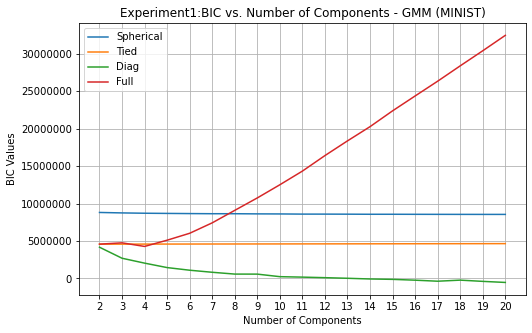

In [71]:
plt.figure(figsize=(8,5))
plt.plot(num_components_values, bic[0], label = 'Spherical')
plt.plot(num_components_values, bic[1], label = 'Tied')
plt.plot(num_components_values, bic[2], label = 'Diag')
plt.plot(num_components_values, bic[3], label = 'Full')
plt.legend()
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values)
plt.title("Experiment1:BIC vs. Number of Components - GMM (MINIST)")
plt.xlabel("Number of Components")
plt.ylabel("BIC Values")
plt.grid()
plt.savefig('minist_exp1_gmm_bic.png')
plt.show()

# silhouette

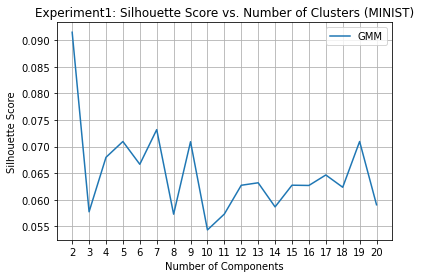

In [70]:
num_components_values = np.arange(2,21,1)
silhouette_avg = []
for num_components in num_components_values:
    gmm = mixture.GaussianMixture(n_components=num_components, covariance_type="full")
    gmm_labels = gmm.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, gmm_labels))
silhouette_avg = np.array(silhouette_avg)
plt.figure(figsize=(8,5))
plt.plot(num_components_values,silhouette_avg, label = "GMM")
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values) 
plt.title('Experiment1: Silhouette Score vs. Number of Clusters (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp1_gmm_silhouette.png')
plt.show()

# adjusted_mutual_info_score

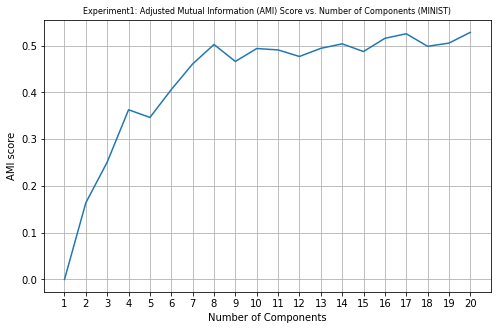

In [4]:
num_components_values = np.arange(1,21,1)
adjusted_mutual_info_score_value = []
for num_components in num_components_values:
    gmm = mixture.GaussianMixture(n_components=num_components, covariance_type="full")
    gmm_labels = gmm.fit_predict(X)
    adjusted_mutual_info_score_value.append(adjusted_mutual_info_score(y, gmm_labels))
adjusted_mutual_info_score_value = np.array(adjusted_mutual_info_score_value)
plt.figure(figsize=(8,5))
plt.plot(num_components_values,adjusted_mutual_info_score_value, label = "GMM")
plt.xlabel('Number of Components')
plt.ylabel('AMI score')
plt.ticklabel_format(style='plain') 
plt.xticks(num_components_values) 
plt.title('Experiment1: Adjusted Mutual Information (AMI) Score vs. Number of Components (MINIST)' ,fontsize = 8)
plt.grid()
plt.savefig('minist_exp1_gmm_AMI.png')
plt.show()

# performance

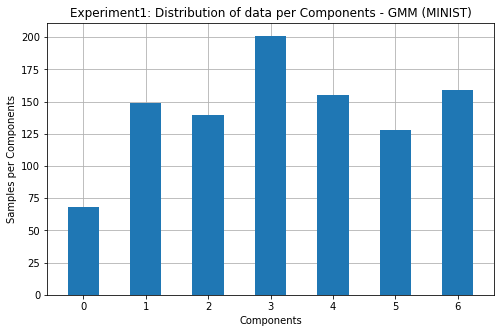

In [72]:
k = 7
gmm = mixture.GaussianMixture(n_components=7, covariance_type="full")
gmm_labels = gmm.fit_predict(X)


plt.figure(figsize=(8,5))
plt.hist(gmm_labels, bins=np.arange(0, k + 1) - 0.5, rwidth=0.5, zorder=2)
plt.xticks(np.arange(0, k))
plt.xlabel('Components')
plt.ylabel('Samples per Components')
plt.title('Experiment1: Distribution of data per Components - GMM (MINIST)')
plt.grid()
plt.savefig('minist_exp1_gmm_distribution.png')

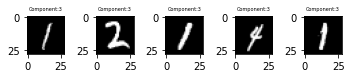

In [78]:
y_plot = gmm_labels[:17]
index_plot = []
for i in range(len(y_plot)):
    if y_plot[i] == 3:
        index_plot.append(i)  
p =1
for j in index_plot:
    plt.subplot(5,5,p)
    p += 1
    plt.title('Component:{}'.format(y_plot[j]),fontsize = 5)
    plt.imshow(X.iloc[j].to_numpy().reshape(28,28),cmap='gray')
    plt.savefig('minist_exp1_gmm_imshow.png');

# Experiment2: Dimensionality Reduction
# PCA

In [79]:
pca = PCA()
pca.fit(X)

PCA()

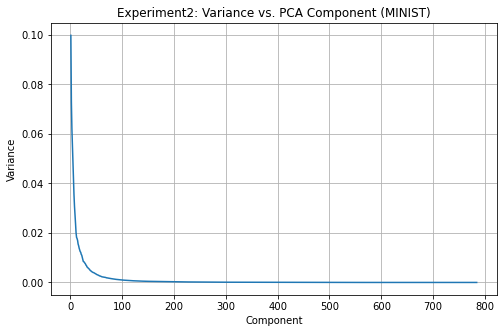

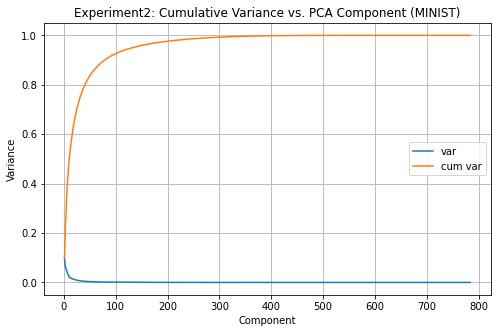

In [81]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_)
# plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1, 2))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Experiment2: Variance vs. PCA Component (MINIST)')
plt.grid()
plt.savefig('minist_exp2_pca_variance.png')


plt.figure(figsize=(8,5))
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_, label='var')
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), np.cumsum(pca.explained_variance_ratio_), label='cum var')
# plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1, 2))
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Experiment2: Cumulative Variance vs. PCA Component (MINIST)')
plt.legend()
plt.grid()
plt.savefig('minist_exp2_pca_cumu_variance.png')

In [84]:
X_=X_train[:6000].values
X_std_=StandardScaler().fit_transform(X_)
pca_=PCA(5)
X_10d=pca_.fit_transform(X_std_)
Target=y_train[:6000]
eigenvalues_=pca_.components_
trace = go.Scatter(
    x = X_10d[:,0],
    y = X_10d[:,1],
    name = str(Target),
    
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        
        opacity = 0.8
    )
)

data=[trace]

layout=go.Layout(title='PCA',
                hovermode='closest',
                xaxis=dict(
                    title='First principal direction',
                    ticklen=5,
                    zeroline=False),
                 yaxis=dict(
                 title='Second principal direction',
                 ticklen=5
            ),
                 showlegend=True
                
                    
                )
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='pca')

# ICA

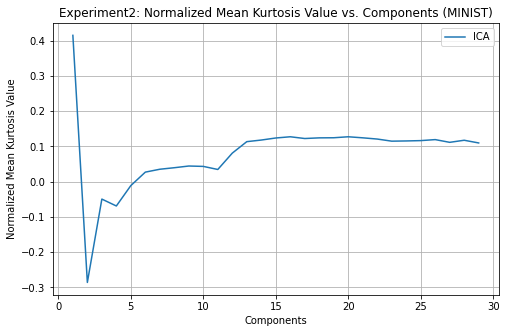

In [87]:
kurtosis_values = []
for i in range(1,30):
    X_ICA = FastICA(n_components = i).fit_transform(X)
    kur = scipy.stats.kurtosis(X_ICA)
    kurtosis_values.append(np.mean(kur)/i)
kurtosis_values = np.array(kurtosis_values)
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,30),kurtosis_values, label="ICA")
plt.xlabel('Components')
plt.ylabel('Normalized Mean Kurtosis Value')
plt.grid()
plt.legend()
plt.title('Experiment2: Normalized Mean Kurtosis Value vs. Components (MINIST)')
plt.savefig('minist_exp2_ica_Kurtosise.png')
plt.show()

In [86]:
X_=X_train[:6000].values
X_std_=StandardScaler().fit_transform(X_)
ica_=FastICA(n_components = 3)
X_3d=ica_.fit_transform(X_std_)
Target=y_train[:6000]
eigenvalues_=ica_.components_
trace = go.Scatter(
    x = X_3d[:,0],
    y = X_3d[:,1],
    name = str(Target),
    
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        
        opacity = 0.8
    )
)

data=[trace]

layout=go.Layout(title='ICA',
                hovermode='closest',
                xaxis=dict(
                    title='First principal direction',
                    ticklen=5,
                    zeroline=False),
                 yaxis=dict(
                 title='Second principal direction',
                 ticklen=5
            ),
                 showlegend=True
                
                    
                )
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='ICA')

# Randomized Projections

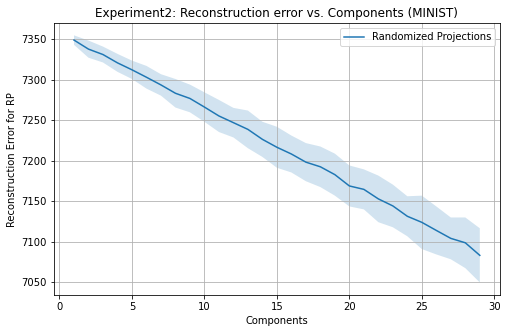

In [88]:
reconstruction_error = []
reconstruction_variance = []
for i in range(1,30):
    mean_mse = []
    for j in range(0,100):
        rp = GaussianRandomProjection(n_components=i)
        X_RP = rp.fit(X)
        w = X_RP.components_
        p = pinv(w)
        reconstructed = ((p@w)@(X.T)).T
        mean_mse.append(mean_squared_error(X,reconstructed))
    reconstruction_variance.append(np.std(mean_mse))
    reconstruction_error.append(np.mean(mean_mse))

reconstruction_error = np.array(reconstruction_error)
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,30),reconstruction_error, label="Randomized Projections")
plt.fill_between(np.arange(1,30),reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
plt.xlabel('Components')
plt.ylabel('Reconstruction Error for RP')
plt.title('Experiment2: Reconstruction error vs. Components (MINIST)')
plt.grid()
plt.legend()
plt.savefig('minist_exp2_rp_Reconstruction_error.png')
plt.show()

In [89]:
X_=X_train[:6000].values
X_std_=StandardScaler().fit_transform(X_)
rp_ = GaussianRandomProjection(n_components=5)
X_3d=rp_.fit_transform(X_std_)
Target=y_train[:6000]
eigenvalues_=rp_.components_
trace = go.Scatter(
    x = X_3d[:,0],
    y = X_3d[:,1],
    name = str(Target),
    
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        
        opacity = 0.8
    )
)

data=[trace]

layout=go.Layout(title='Randomized Projections',
                hovermode='closest',
                xaxis=dict(
                    title='First principal direction',
                    ticklen=5,
                    zeroline=False),
                 yaxis=dict(
                 title='Second principal direction',
                 ticklen=5
            ),
                 showlegend=True
                
                    
                )
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='Randomized Projections')

# Feature Selection using Trees

In [90]:
etc = ExtraTreesClassifier(n_estimators = 100)
etc = etc.fit(X,y)
# print(etc.feature_importances_)
model = SelectFromModel(etc, prefit=True)
X_Trees = model.transform(X)
# print(model.get_support())
X_Trees_train, X_Trees_test, y_Trees_train, y_Trees_test = train_test_split(X_Trees, y, test_size=0.3, random_state=42)

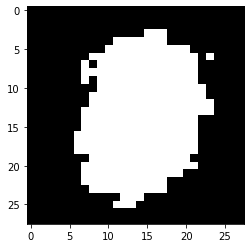

In [91]:
plt.imshow(model.get_support().reshape(28,28),cmap='gray')
plt.savefig('minist_exp2_dt_imshow1.png');

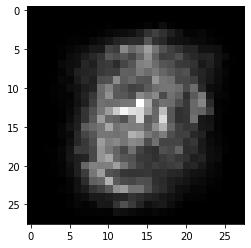

In [92]:
plt.imshow(etc.feature_importances_.reshape(28,28),cmap='gray')
plt.savefig('minist_exp2_dt_imshow2.png');